<h3>First we import the required modules</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Read the data into a pandas DataFrame</h3>

In [5]:
# Read from URL
adv_data_from_url = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv') 
# Read from filesystem
adv_data = pd.read_csv('/home/femibyte/devel/sandbox/data/islr/Advertising.csv')

<h3>Display the first few rows</h3>

In [6]:
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<h3>Display the last 5 rows</h3>

In [7]:
adv_data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


<h3>Display the shape of the DataFrame, i.e. rows x columns</h3>

In [8]:
adv_data.shape

(200, 5)

<h3>Obtain just the feature data</h3>

In [9]:
feature_cols = ['TV','Radio','Newspaper']

In [11]:
X = adv_data[['TV','Radio','Newspaper']]
X = adv_data[feature_cols]

In [12]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
print type(X)

<class 'pandas.core.frame.DataFrame'>


In [14]:
print X.shape

(200, 3)


<h3>Obtain the response data</h3>

In [15]:
y = adv_data['Sales']

In [16]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

<b>The shape function confirms that the response is a 1-D array or pandas Series</b>

In [17]:
print type(y)

<class 'pandas.core.series.Series'>


<h3>Visualize each feature of the data using matplotlib by plotting Sales vs. feature
and corresponding linear regression lines</h3>

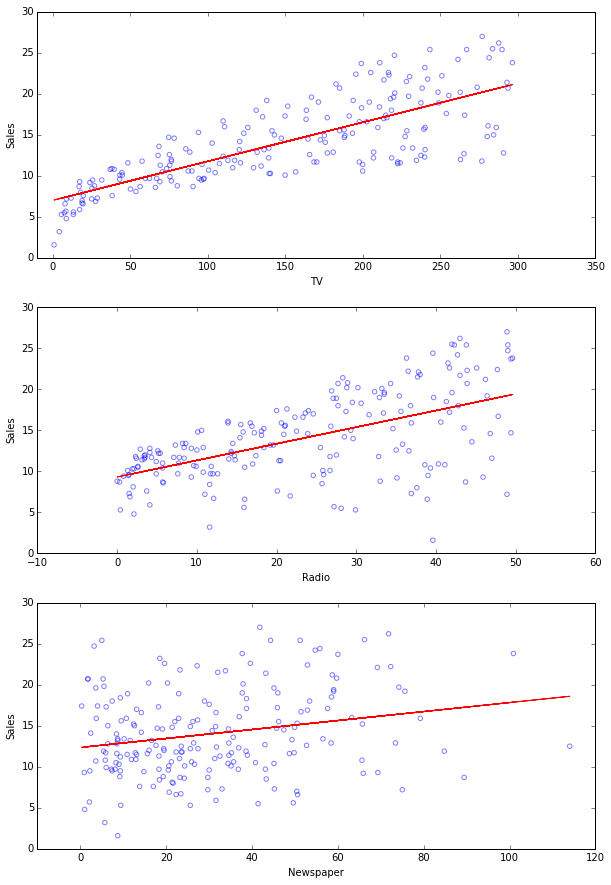

In [21]:
% matplotlib inline
subplots = [111,211,311]
fig, ax_lst = plt.subplots(len(subplots), figsize=(10,15))

idx=0
for col in feature_cols:
    ax=ax_lst[idx]
    ax.scatter(X[col],y,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Sales')
    ax.set_xlim(-10)
    slope, intercept = np.polyfit(X[col],y,1)
    ax.plot(X[col],X[col]*slope +intercept,'r')
    idx += 1
plt.show()

<h3>Split X and y into training and testing sets </h3>

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


<b>The default split is 75% for training and 25% for testing</b>

In [23]:
print X_train.shape

(150, 3)


In [24]:
print y_train.shape

(150,)


In [25]:
print X_test.shape

(50, 3)


In [26]:
print y_test.shape

(50,)


<h3>Linear regression using scikit-learn</h3>

<b>First, import the model</b>

In [27]:
from sklearn.linear_model import LinearRegression

<b>Instantiate the model</b>

In [28]:
lr_model = LinearRegression()

<b>We now fit the model</b>

In [30]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>Obtain model coefficients</b>

In [31]:
print lr_model.intercept_

2.87696662232


In [32]:
print lr_model.coef_

[ 0.04656457  0.17915812  0.00345046]


In [33]:
feature_cols = ['TV','Radio','Newspaper']


<b>Pair feature names with corresponding coefficients for clarity</b>

In [34]:
zip(feature_cols,lr_model.coef_)

[('TV', 0.046564567874150253),
 ('Radio', 0.17915812245088841),
 ('Newspaper', 0.0034504647111804204)]

<b>Intrepreting model coefficients</b>

When we plug in the intercept and model coefficients into the linear regression equation, we obtain:

$$y = 2.877 + 0.0466*TV + 0.179*Radio + 0.00345*Newspaper$$

This can be interpreted as follows:<br>
 &nbsp;<b>TV</b> : Every \$1000 in TV ad spending is associated with in an increase of 46.6 units in Sales <br>
 &nbsp;<b>Radio</b> : Every \$1000 in Radio ad spending is associated with in an increase of 179 units in Sales <br>
 &nbsp;<b>Newsaper</b> : Every \$1000 in Newspaper ad spending is associated with in an increase of 3.45 units in Sales <br>
 This is because 1 unit of ad spending = \$1000 and 1 unit of Sales = 1000 items
 

<b>Making predictions</b>

<b>We now make predictions on the testing set</b>

In [35]:
y_pred = lr_model.predict(X_test)

In [36]:
y_pred.shape

(50,)

In [38]:
y_pred[:5]

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,  18.6146359 ])

<b>Measuring the accuracy of our model</b>

To calculate the accuracy of our model we will make use of a measure called the root-mean-square error or <b>RMSE</b>. It measures the sum of the squares of distances of each point in the predicted response <em><b>y</b></em> with the corr. true value in the test set <em><b>y_test</b></em>.
It is calculated in this case as follows:<p>
$$RMSE = \sqrt{\frac{(y_0 - y\_test_0)^2 + (y_1 - y\_test_1)^2 + \cdots + (y_n - y\_test_n)^2}{n}}$$<br>
$$=\sqrt{\frac{\sum_{i=1}^{n}{(y_i-y\_test_i)^2}}{n}}$$

A simple illustration of the RMSE concept in 1 dimension can be seen in this diagram:


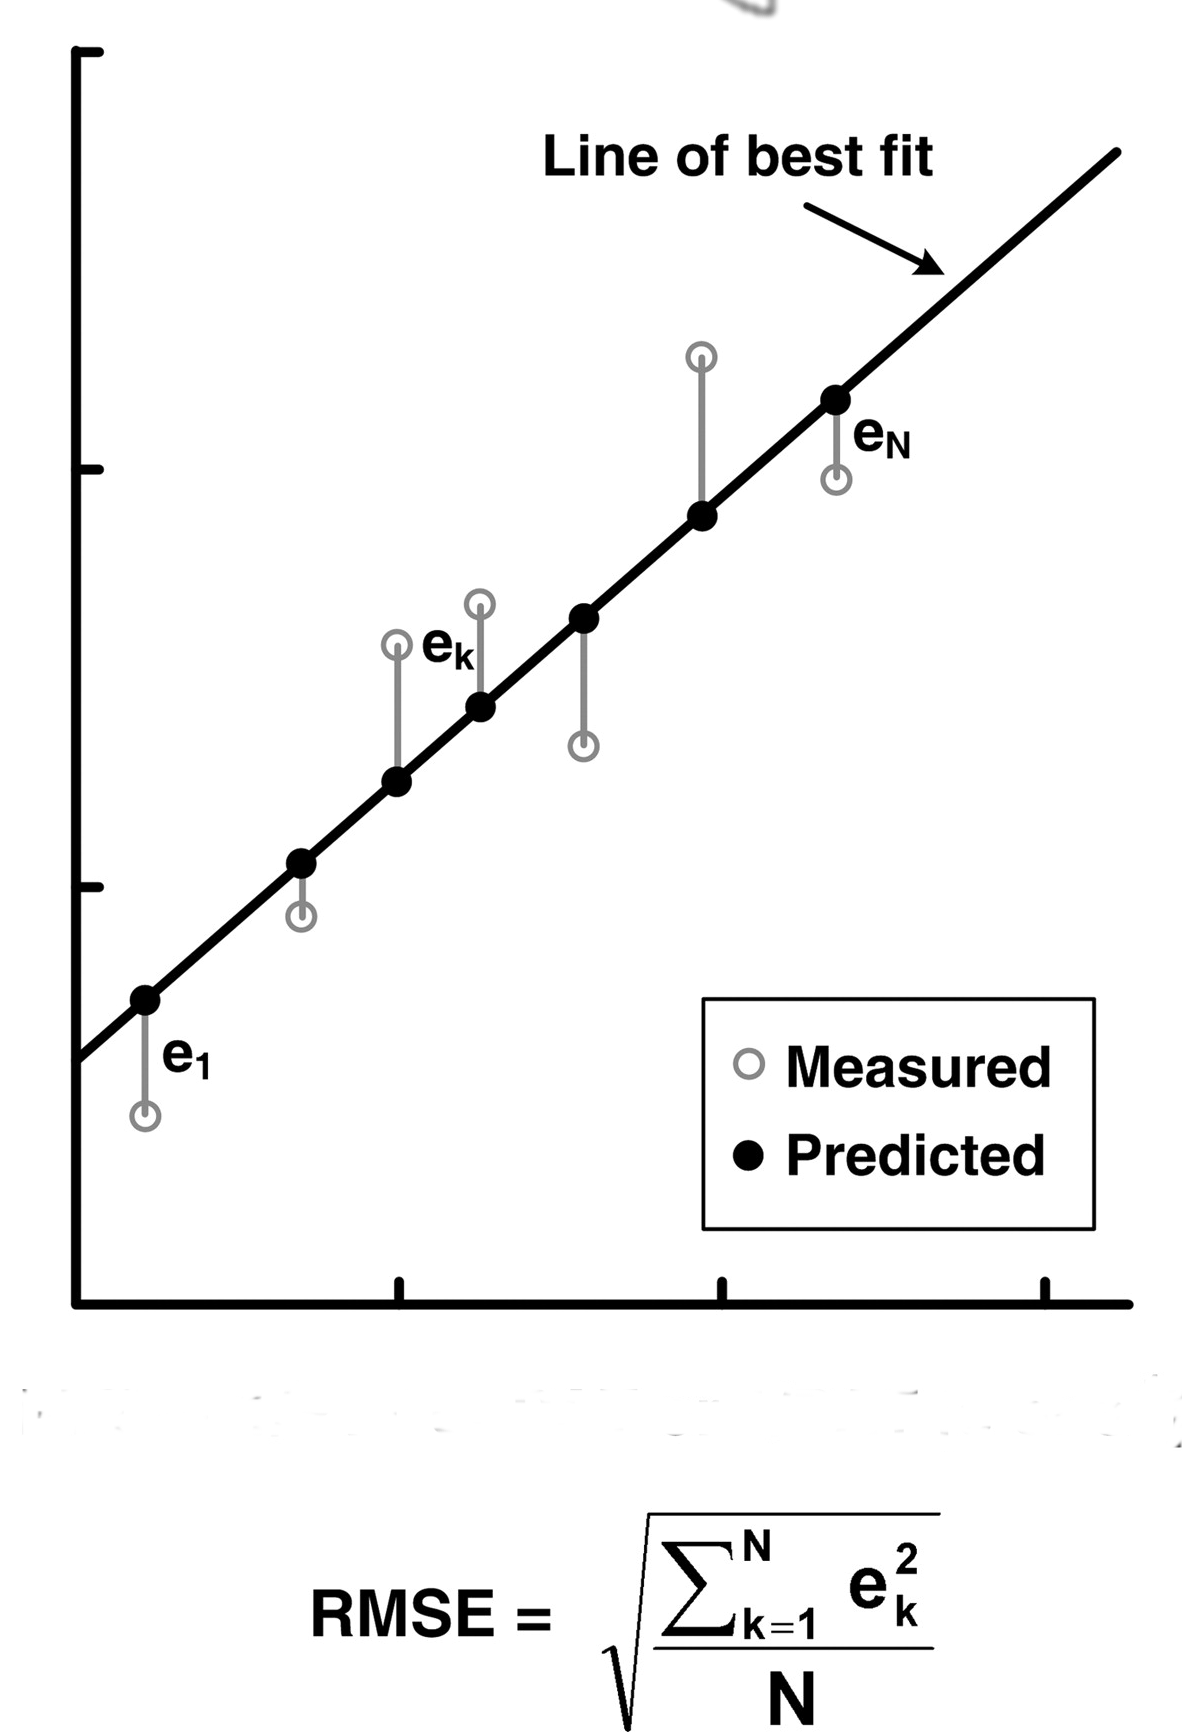

In [51]:
from IPython.display import Image
Image(filename='/home/femibyte/devel/sandbox/RMSE.png', width=250, height=250)

<h3>Compute the RMSE for our Sales predictions</h3>

In [39]:
from sklearn import metrics

In [41]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print RMSE

1.40465142303


<b>Our RMSE is 1.4, which is pretty good considering the range of sales:</b>

In [44]:
print min(y), max(y)

1.6 27.0


<b>Can we improve on our RMSE ? </b>

We can try to improve our score using a technique we often use while doing machine learning.
Feature selection. If we refer back to the plots we made above showing the Sales data vs. each 
feature we can see that the Newspaper feature appeared to have a weak correlation with Sales.
So one thing we can do is exclude the Newspaper feature and see how it affects our RMSE score.


<b>Remove Newspaper from least of features</b>

In [46]:
feature_cols = ['TV','Radio']

Repeat previous code

In [47]:
# Obtain subset of original DataFrame
X = adv_data[feature_cols]

# Select Sales data as Series from the original DataFrame
y = adv_data.Sales

# split into test and training sets as before
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

#Fit the model to the training data
lr_model.fit(X_train,y_train)

#Make predictions on the test set
y_pred = lr_model.predict(X_test)

#Compute the RMSE of our predictions
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print RMSE

1.38790346994


<b>Our new RMSE is 1.39, which is a slight improvement from the previous model</b><br>
The RMSE decreased when Newspaper was removed from the model. Since we wish to minimize our error, a lower RMSE is better. This indicates that the Newspaper feature is not very useful for predicting Sales and hence should be removed from the model.

<b>Remove additional features</b><br>
Suppose we decide to go even further and remove additional features. 
Does that improve our RMSE ? Let's see.

In [51]:
feature_cols = ['TV']
# Obtain subset of original DataFrame
X = adv_data[feature_cols]

# Select Sales data as Series from the original DataFrame
y = adv_data.Sales

# split into test and training sets as before
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

#Fit the model to the training data
lr_model.fit(X_train,y_train)

#Make predictions on the test set
y_pred = lr_model.predict(X_test)

#Compute the RMSE of our predictions
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print RMSE

3.2109297077


<b>Our new RMSE is 3.21 which is much worse then 1.38</b><br>
Excluding Radio from the list of features is probably not a good idea.

<h3>Conclusion</h3>
Our conclusion is that the 2 most important features are TV and Radio in terms of 
impact on Sales. The Newspaper feature barely impacts Sales so as an analyst we would recommend
cutting back on the Newspaper advertising budget.
We can see that feature selection is very important when we wish to use 
machine learning for making predictions. 
